In [ ]:
# Establish the functionality for our assessment by bringing in the right packages
# Make sure to install these prior to mounting the packages 
# i.e. $ pip install pydotplus
# & visit http://www.graphviz.org/Download_macos.php
!pip install pydotplus
!pip install sklearn
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import pydotplus as pdot
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
# model_selection was called cross_validation in older packages
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
# Connect to the data source
myPredictionData = pd.read_csv("prediction-py.csv")

In [ ]:
# Show column names for reference
myPredictionData.columns

In [ ]:
# Set up our cross validation function

feature_cols = ['capita', 'competition', 'weather', 'var1', 'var2', 'var3' ]

train_X, test_X,  \
train_y, test_y = train_test_split( myPredictionData[feature_cols],
                                    myPredictionData['sales_classification'])

In [ ]:
# Set up our depth list for our tree branches

depths_list = [2,3,4,5,6,7,8]

for depth in depths_list:
    clf_tree = DecisionTreeClassifier( max_depth = depth )
    clf_tree.fit( train_X, train_y )

In [ ]:
# Specify the number of branches for our tree
cif_tree = DecisionTreeClassifier(max_depth = 8)

In [ ]:
# Fit our training data to the x and to the y
clf_tree.fit(train_X, train_y)

In [ ]:
# Apply our test data to our model 
tree_predict = clf_tree.predict(test_X)

In [ ]:
#use conda install instead of pip install
!conda install graphviz

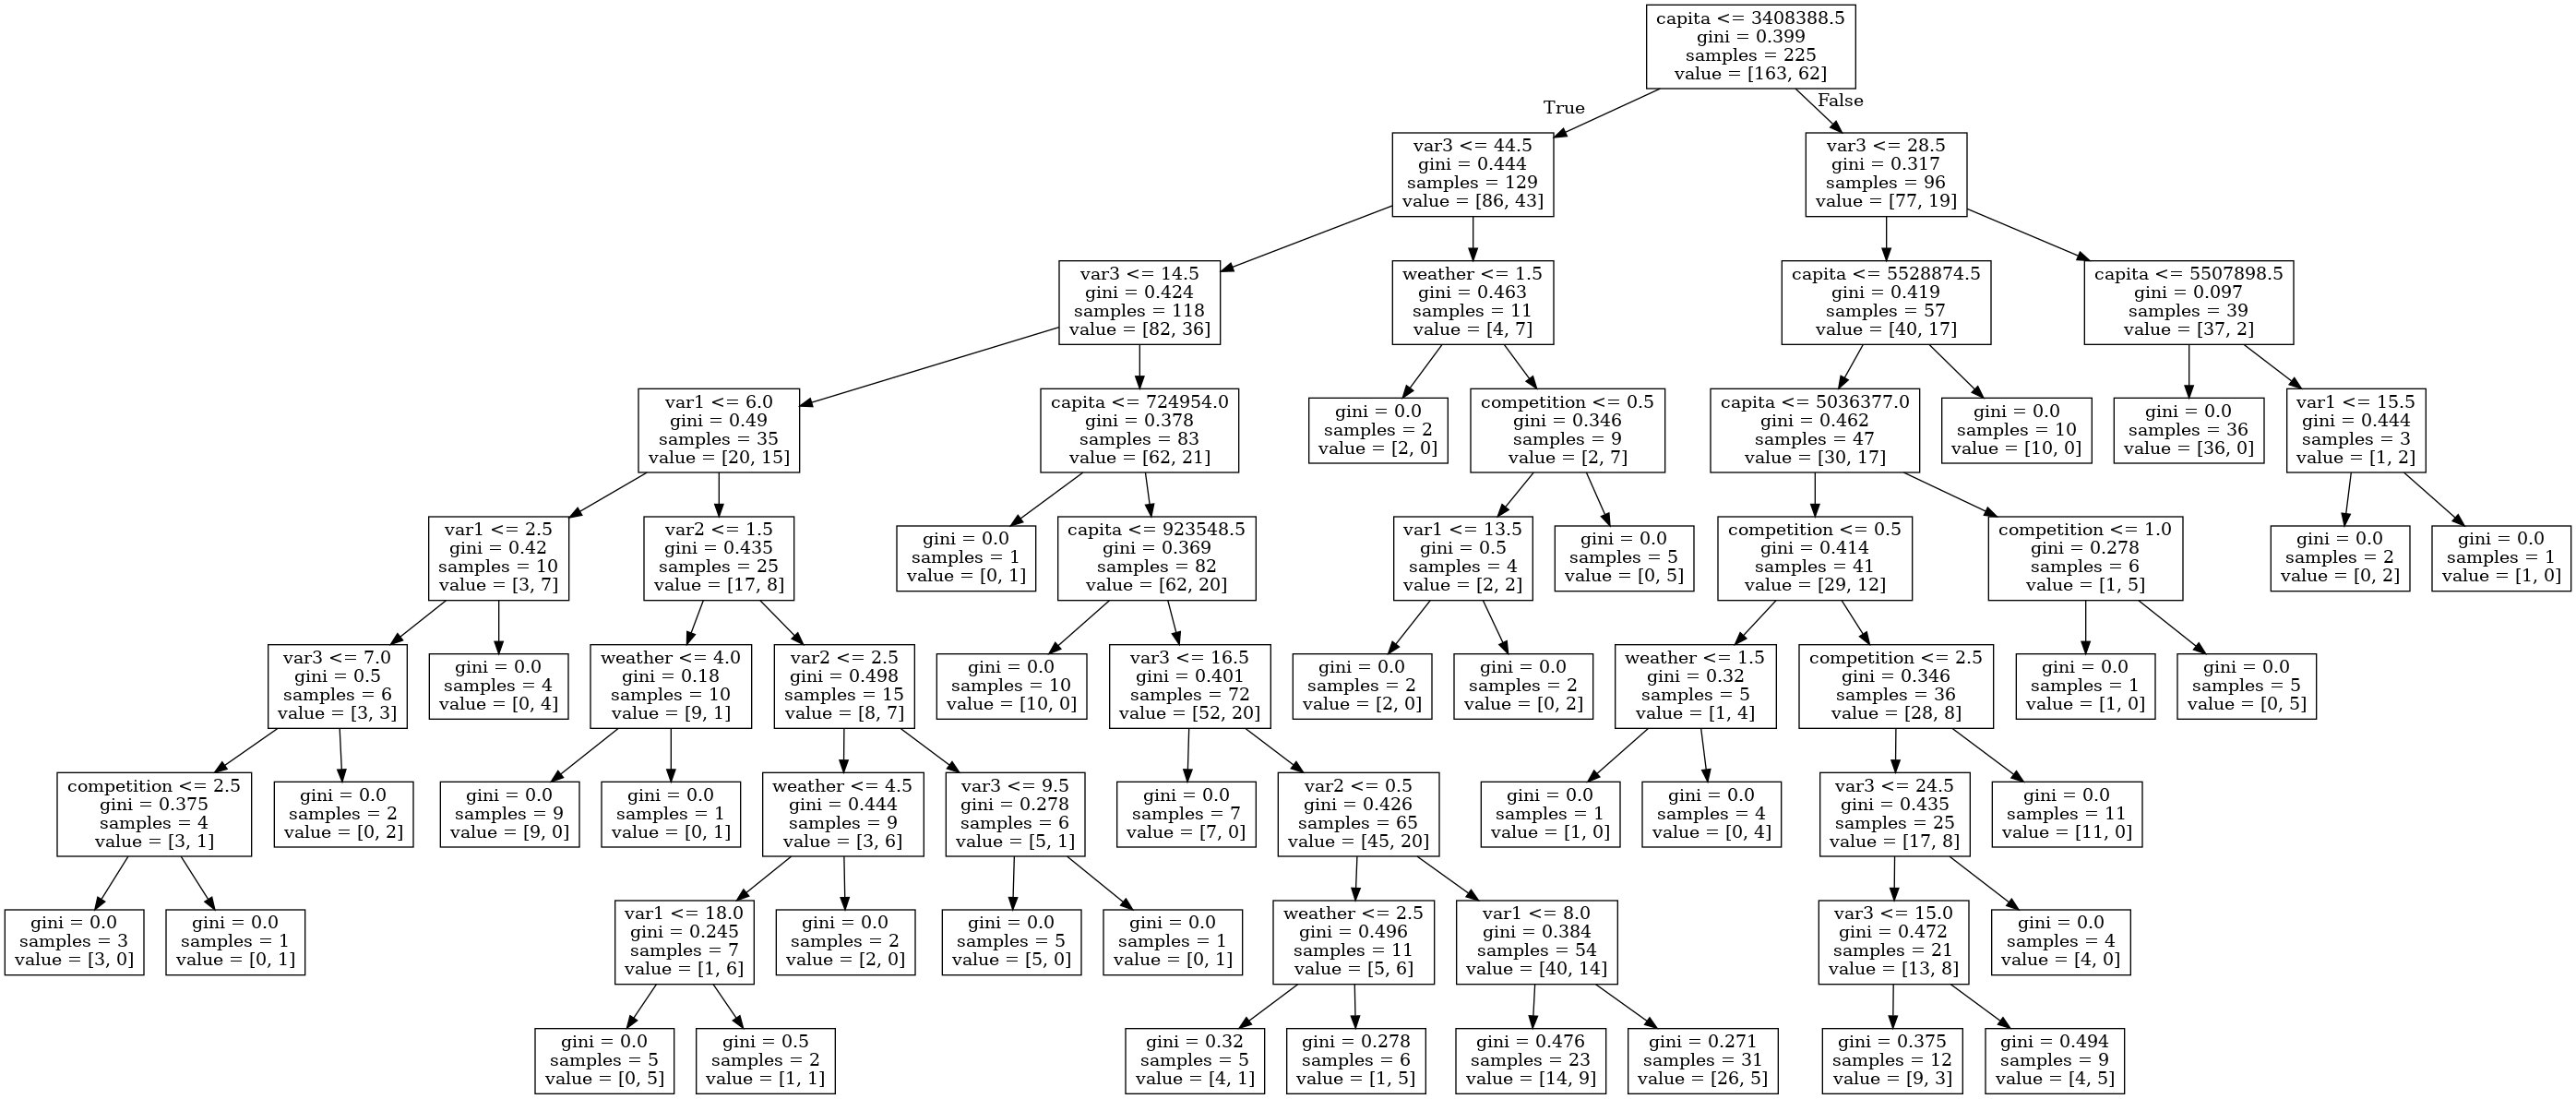

In [13]:
# Visualize our tree
export_graphviz( clf_tree,
                out_file = "model_tree.odt",
                feature_names = train_X.columns )
model_tree_graph = pdot.graphviz.graph_from_dot_file( 'model_tree.odt' )
model_tree_graph.write_png( 'model_tree.png' )

from IPython.display import Image
Image(filename='model_tree.png')